In [5]:
# Importa las bibliotecas necesarias
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import requests
import json
import pandas as pd

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Este conjunto de datos contiene información sobre tres especies de flores iris, 
# donde cada muestra tiene cuatro características (longitud y anchura del sépalo y del pétalo).

In [4]:
# Clasificación: K vecinos más cercanos (KNN)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split() de scikit-learn. 
# En este caso, se utiliza el 80% de los datos para entrenamiento y el 20% restante para prueba.

scaler = StandardScaler()
# Se estandarizan las características utilizando StandardScaler() para asegurarse de que todas tengan la misma escala
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
# Se crea un clasificador KNN utilizando la clase KNeighborsClassifier() de scikit-learn. 
# En este caso, se especifica que se utilicen 3 vecinos más cercanos para la clasificación.

knn.fit(X_train_scaled, y_train)
# Se entrena el clasificador KNN utilizando el conjunto de datos de entrenamiento escalado (características y etiquetas) con el método fit().

accuracy = knn.score(X_test_scaled, y_test)
# Se evalúa el rendimiento del clasificador utilizando el conjunto de datos de prueba escalado con el método score()

print("Accuracy of KNN Classifier:", accuracy)

Accuracy of KNN Classifier: 1.0


In [6]:
# Guardar los resultados de la clasificación en un archivo CSV
resultados_clasificacion = np.column_stack((X_test, y_test, knn.predict(X_test_scaled)))
np.savetxt('resultados_clasificacion.csv', resultados_clasificacion, delimiter=',')

# URL de Elasticsearch y nombre del índice
url = 'http://localhost:9200/iris/_doc'

# Convertir las etiquetas a un tipo de datos compatible con la serialización JSON
y_test_serializable = y_test.astype(int).tolist()

# Enviar los datos a Elasticsearch
for i in range(len(X_test)):
    # Convertir la etiqueta predicha a un tipo de datos compatible con JSON
    etiqueta_predicha = int(knn.predict(X_test_scaled[i].reshape(1, -1))[0])

    # Construir el diccionario de datos
    data = {
        "caracteristica_1": X_test[i, 0],
        "caracteristica_2": X_test[i, 1],
        "caracteristica_3": X_test[i, 2],
        "caracteristica_4": X_test[i, 3],
        "etiqueta_real": y_test_serializable[i],  # Usar las etiquetas convertidas
        "etiqueta_predicha": etiqueta_predicha  # Convertir la etiqueta predicha a int
    }
    response = requests.post(url, json=data, auth=('elastic', 'elastic'))
    print(response.text)


{"_index":"iris","_id":"iDIb7Y4BXhYy_ycKekNc","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":210,"_primary_term":3}
{"_index":"iris","_id":"iTIb7Y4BXhYy_ycKe0M9","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":211,"_primary_term":3}
{"_index":"iris","_id":"ijIb7Y4BXhYy_ycKe0NM","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":212,"_primary_term":3}
{"_index":"iris","_id":"izIb7Y4BXhYy_ycKe0Na","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":213,"_primary_term":3}
{"_index":"iris","_id":"jDIb7Y4BXhYy_ycKe0Nn","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":214,"_primary_term":3}
{"_index":"iris","_id":"jTIb7Y4BXhYy_ycKe0N3","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":215,"_primary_term":3}
{"_index":"iris","_id":"jjIb7Y4BXhYy_ycKe0OB",

In [7]:
# Regresión lineal con el conjunto de datos Diabetes
iris = datasets.load_iris()
X = iris.data[:, 2:3]   # Tomamos solo la tercera característica (longitud del pétalo)
y = iris.data[:, 3]     # La cuarta característica será nuestro objetivo (anchura del pétalo)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = lr.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
r2_score = lr.score(X_test_scaled, y_test)
print("R^2 Score of Linear Regression:", r2_score)

R^2 Score of Linear Regression: 0.9282562958836973


In [8]:
# Crear un DataFrame de pandas para almacenar las predicciones
df_predicciones = pd.DataFrame({
    'longitud_petalo': X_test.flatten(),  # Aplanar el array de características para que tenga una dimensión
    'anchura_petalo_real': y_test,
    'anchura_petalo_predicha': y_pred
})

# Guardar el DataFrame como un archivo CSV
df_predicciones.to_csv('resultados_regresion.csv', index=False)

# URL de Elasticsearch y nombre del índice
url = 'http://localhost:9200/iris/_doc'

# Enviar los datos a Elasticsearch
for index, row in df_predicciones.iterrows():
    data = {
        "longitud_petalo": row['longitud_petalo'],
        "anchura_petalo_real": row['anchura_petalo_real'],
        "anchura_petalo_predicha": row['anchura_petalo_predicha']
    }
    response = requests.post(url, json=data, auth=('elastic', 'elastic'))
    print(response.text)

{"_index":"iris","_id":"pjIb7Y4BXhYy_ycKi0Nt","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":240,"_primary_term":3}
{"_index":"iris","_id":"pzIb7Y4BXhYy_ycKi0N4","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":241,"_primary_term":3}
{"_index":"iris","_id":"qDIb7Y4BXhYy_ycKi0OC","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":242,"_primary_term":3}
{"_index":"iris","_id":"qTIb7Y4BXhYy_ycKi0OL","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":243,"_primary_term":3}
{"_index":"iris","_id":"qjIb7Y4BXhYy_ycKi0OU","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":244,"_primary_term":3}
{"_index":"iris","_id":"qzIb7Y4BXhYy_ycKi0Oc","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":245,"_primary_term":3}
{"_index":"iris","_id":"rDIb7Y4BXhYy_ycKi0Om",

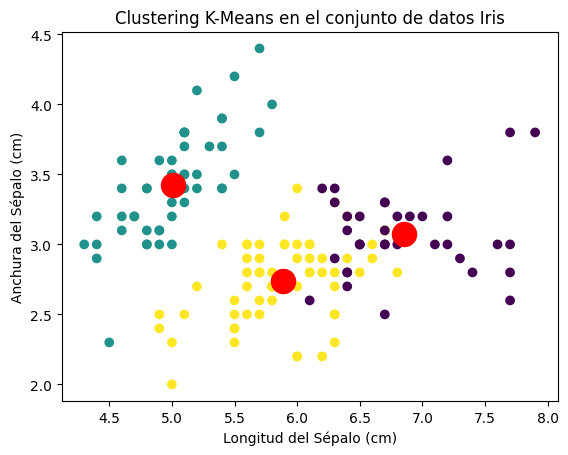

In [9]:
# Clustering: K-Means
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data

# Crear el modelo de clustering K-Means
kmeans = KMeans(n_clusters=3)  # Definimos el número de clústeres como 3, ya que sabemos que hay 3 clases(tipos) en el conjunto de datos Iris

# Entrenar el modelo de clustering
kmeans.fit(X)

# Visualizar los clústeres
# Creamos un gráfico de dispersión de nuestros datos
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
# Mostramos los centros de los clústeres en el gráfico
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

plt.title("Clustering K-Means en el conjunto de datos Iris")
plt.xlabel("Longitud del Sépalo (cm)")
plt.ylabel("Anchura del Sépalo (cm)")
plt.show()

In [10]:
# Guardar los resultados del clustering en un archivo CSV
np.savetxt('resultados_clustering.csv', kmeans.labels_, delimiter=',')

# URL de Elasticsearch y nombre del índice
url = 'http://localhost:9200/iris/_doc'

# Enviar los datos a Elasticsearch
for i in range(len(X)):
    data = {
        "longitud_sepalo_cluster": X[i, 0],
        "anchura_sepalo_cluster": X[i, 1],
        "clustering_label": int(kmeans.labels_[i])  # Convertimos la etiqueta a entero si es necesario
    }
    response = requests.post(url, json=data, auth=('elastic', 'elastic'))
    print(response.text)

{"_index":"iris","_id":"xDIb7Y4BXhYy_ycKpUNp","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":270,"_primary_term":3}
{"_index":"iris","_id":"xTIb7Y4BXhYy_ycKpUNz","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":271,"_primary_term":3}
{"_index":"iris","_id":"xjIb7Y4BXhYy_ycKpUN9","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":272,"_primary_term":3}
{"_index":"iris","_id":"xzIb7Y4BXhYy_ycKpUOF","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":273,"_primary_term":3}
{"_index":"iris","_id":"yDIb7Y4BXhYy_ycKpUOO","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":274,"_primary_term":3}
{"_index":"iris","_id":"yTIb7Y4BXhYy_ycKpUOX","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":275,"_primary_term":3}
{"_index":"iris","_id":"yjIb7Y4BXhYy_ycKpUOf",

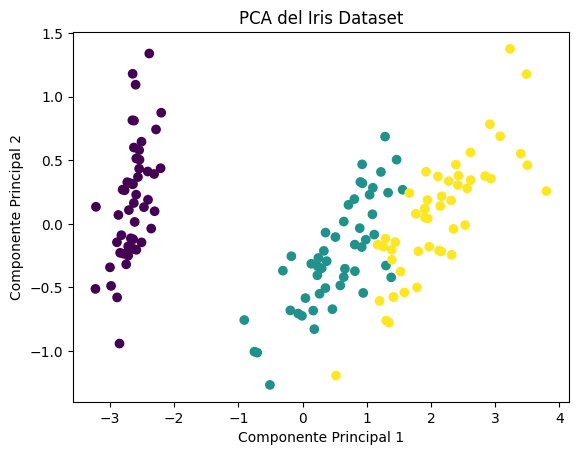

In [11]:
# Reducción de dimensionalidad: PCA
X, y = datasets.load_iris(return_X_y=True)

# Creamos una instancia de PCA reduciendo la dimensionalidad a dos componentes principales (gráfico bidimensional)
pca = PCA(n_components=2)

# Entrenamos el modelo PCA con las caracteristicas de entrada 'X' y transformar los datos
X_pca = pca.fit_transform(X)

# Visualizamos los datos reducidos en un gráfico de dispersión en el nuevo espacio de características bidimensional. 
# c=y para colorear los puntos según las etiquetas originales del conjunto de datos Iris
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')

plt.title("PCA del Iris Dataset")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [12]:
# Guardamos los datos transformados por PCA en un archivo CSV
np.savetxt('datos_pca.csv', X_pca, delimiter=',')

# URL de Elasticsearch y nombre del índice
url = 'http://localhost:9200/iris/_doc'

# Enviar los datos a Elasticsearch
for i in range(len(X_pca)):
    data = {
        "componente_principal_1": X_pca[i, 0],
        "componente_principal_2": X_pca[i, 1],
        "etiqueta": int(y[i])  # Convertimos la etiqueta a entero si es necesario
    }
    response = requests.post(url, json=data, auth=('elastic', 'elastic'))
    print(response.text) 

{"_index":"iris","_id":"WjIb7Y4BXhYy_ycKw0Q8","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":420,"_primary_term":3}
{"_index":"iris","_id":"WzIb7Y4BXhYy_ycKxEQL","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":421,"_primary_term":3}
{"_index":"iris","_id":"XDIb7Y4BXhYy_ycKxEQS","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":422,"_primary_term":3}
{"_index":"iris","_id":"XTIb7Y4BXhYy_ycKxEQZ","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":423,"_primary_term":3}
{"_index":"iris","_id":"XjIb7Y4BXhYy_ycKxEQg","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":424,"_primary_term":3}
{"_index":"iris","_id":"XzIb7Y4BXhYy_ycKxEQp","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":425,"_primary_term":3}
{"_index":"iris","_id":"YDIb7Y4BXhYy_ycKxEQw",